In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import patches

In [2]:
inp = np.random.choice(range(10), (5, 5))
filter_conv = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])

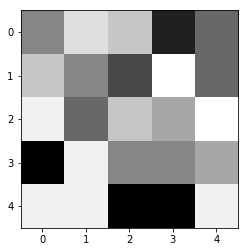

In [3]:
plt.imshow(inp, cmap='Greys')

Text(0.5, 1.0, 'Filter')

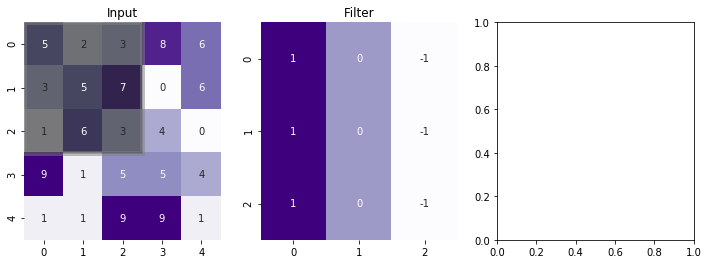

In [4]:
fig, ax = plt.subplots(ncols=3, figsize=(12, 4))

sns.heatmap(inp, annot=True, cbar=None, ax=ax[0], cmap='Purples')
sns.heatmap(filter_conv, annot=True, cbar=None, ax=ax[1], cmap='Purples')
g = ax[0]
rect = patches.Rectangle((0,0),3,3,linewidth=5,edgecolor='grey',facecolor='black', alpha=0.5)

# Add the patch to the Axes
g.add_patch(rect)

ax[0].set_title("Input")
ax[1].set_title("Filter")

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.animation

#####################
# Array preparation
#####################

#input array
n = 6
p = 0
s = 2
f = 3
a = np.random.randint(0, 5, size=(n, n))
# kernel
kernel = np.tile([1, 0, -1], f).reshape(f, f)
#f = kernel.shape[0]

def create_animation(a, kernel, p, s, fname, frate, figsize=(8, 4)):

    if p:
        # visualization array (2 bigger in each direction)
        va = np.zeros((a.shape[0]+2*p, a.shape[1]+2*p), dtype=int)
        va[p:-p,p:-p] = a
        va_color = np.zeros((a.shape[0]+2*p, a.shape[1]+2*p)) 
        va_color[p:-p,p:-p] = 0.5
    else:
        va = a
        va_color = np.zeros_like(a)
    n = a.shape[0]
    o_shape = np.floor_divide(n+2*p-f, s)+1
    #output array
    res = np.zeros((o_shape, o_shape))



    #####################
    # Create inital plot
    #####################
    fig = plt.figure(figsize=figsize)

    def add_axes_inches(fig, rect):
        w,h = fig.get_size_inches()
        return fig.add_axes([rect[0]/w, rect[1]/h, rect[2]/w, rect[3]/h])

    axwidth = 3.
    cellsize = axwidth/va.shape[1]
    axheight = cellsize*va.shape[0]

    ax_va  = add_axes_inches(fig, [cellsize, cellsize, axwidth, axheight])
    ax_kernel  = add_axes_inches(fig, [cellsize*2+axwidth,
                                       (2+res.shape[0])*cellsize-kernel.shape[0]*cellsize,
                                       kernel.shape[1]*cellsize,  
                                       kernel.shape[0]*cellsize])
    ax_res = add_axes_inches(fig, [cellsize*3+axwidth+kernel.shape[1]*cellsize,
                                   2*cellsize, 
                                   res.shape[1]*cellsize,  
                                   res.shape[0]*cellsize])
    ax_kernel.set_title("Kernel", size=12)

    im_va = ax_va.imshow(va_color, vmin=0., vmax=1.3, cmap="Blues")
    ax_va.set_title("Image size: {}X{}\n Padding: {} and Strides: {}".format(n, n, p, s))
    for i in range(va.shape[0]):
        for j in range(va.shape[1]):
            ax_va.text(j,i, va[i,j], va="center", ha="center")

    ax_kernel.imshow(np.zeros_like(kernel), vmin=-1, vmax=1, cmap="Pastel1")
    for i in range(kernel.shape[0]):
        for j in range(kernel.shape[1]):
            ax_kernel.text(j,i, kernel[i,j], va="center", ha="center")


    im_res = ax_res.imshow(res, vmin=0, vmax=1.3, cmap="Greens")
    res_texts = []
    for i in range(res.shape[0]):
        row = []
        for j in range(res.shape[1]):
            row.append(ax_res.text(j,i, "", va="center", ha="center"))
        res_texts.append(row)    

    ax_res.set_title("Output size: {}X{}".format(n+2*p-f+1, n+2*p-f+1))

    for ax  in [ax_va, ax_kernel, ax_res]:
        ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
        ax.yaxis.set_major_locator(mticker.IndexLocator(1,0))
        ax.xaxis.set_major_locator(mticker.IndexLocator(1,0))
        ax.grid(color="k")

    ###############
    # Animation
    ###############
    def init():
        for row in res_texts:
            for text in row:
                text.set_text("")

    def animate(ij):
        i,j=ij
        o = kernel.shape[1]//2
        # calculate result

        res_ij = (kernel*va[1+s*i-o:1+s*i+o+1, 1+s*j-o:1+s*j+o+1]).sum()
        res_texts[i][j].set_text(res_ij)
        # make colors
        c = va_color.copy()
        c[1+s*i-o:1+s*i+o+1, 1+s*j-o:1+s*j+o+1] = 1.
        im_va.set_array(c)

        r = res.copy()
        r[i,j] = 1
        im_res.set_array(r)



    i,j = np.indices(res.shape)
    ani = matplotlib.animation.FuncAnimation(fig, animate, init_func=init, 
                                             frames=zip(i.flat, j.flat), interval=frate)
    ani.save(fname, writer="imagemagick")

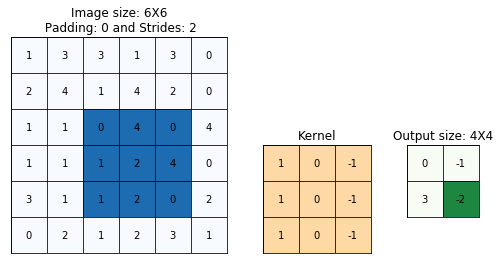

In [9]:
create_animation(a, kernel, p, s, 'demo.gif', 400)

In [10]:
from keras.datasets import mnist


Using TensorFlow backend.


In [11]:
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

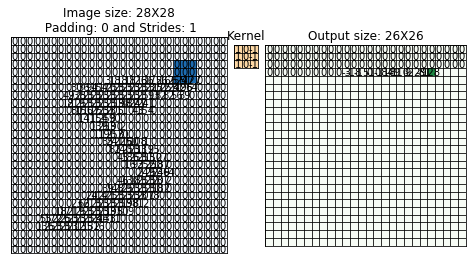

In [12]:
create_animation(x_train[0], kernel, 0, 1, 'mnist.gif', 2, (20, 4))

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.animation

#####################
# Array preparation
#####################

#input array
n = 6
p = 0
s = 2
f = 3
a = np.random.randint(0, 5, size=(n, n))
# kernel
kernel = np.tile([1, 0, -1], f).reshape(f, f)
#f = kernel.shape[0]

def create_static(a, kernel, p, s, fname, frate, figsize=(8, 4)):

    if p:
        # visualization array (2 bigger in each direction)
        va = np.zeros((a.shape[0]+2*p, a.shape[1]+2*p), dtype=int)
        va[p:-p,p:-p] = a
        va_color = np.zeros((a.shape[0]+2*p, a.shape[1]+2*p)) 
        va_color[p:-p,p:-p] = 0.5
    else:
        va = a
        va_color = np.zeros_like(a)
    n = a.shape[0]
    o_shape = np.floor_divide(n+2*p-f, s)+1
    #output array
    res = np.zeros((o_shape, o_shape))



    #####################
    # Create inital plot
    #####################
    fig = plt.figure(figsize=figsize)

    def add_axes_inches(fig, rect):
        w,h = fig.get_size_inches()
        return fig.add_axes([rect[0]/w, rect[1]/h, rect[2]/w, rect[3]/h])

    axwidth = 3.
    cellsize = axwidth/va.shape[1]
    axheight = cellsize*va.shape[0]

    ax_va  = add_axes_inches(fig, [cellsize, cellsize, axwidth, axheight])
    ax_kernel  = add_axes_inches(fig, [cellsize*2+axwidth,
                                       (2+res.shape[0])*cellsize-kernel.shape[0]*cellsize,
                                       kernel.shape[1]*cellsize,  
                                       kernel.shape[0]*cellsize])
    ax_res = add_axes_inches(fig, [cellsize*3+axwidth+kernel.shape[1]*cellsize,
                                   2*cellsize, 
                                   res.shape[1]*cellsize,  
                                   res.shape[0]*cellsize])
    ax_kernel.set_title("Kernel", size=12)

    im_va = ax_va.imshow(va_color, vmin=0., vmax=1.3, cmap="Blues")
    ax_va.set_title("Image size: {}X{}\n Padding: {} and Strides: {}".format(n, n, p, s))
    for i in range(va.shape[0]):
        for j in range(va.shape[1]):
            ax_va.text(j,i, va[i,j], va="center", ha="center")

    ax_kernel.imshow(np.zeros_like(kernel), vmin=-1, vmax=1, cmap="Pastel1")
    for i in range(kernel.shape[0]):
        for j in range(kernel.shape[1]):
            ax_kernel.text(j,i, kernel[i,j], va="center", ha="center")


    im_res = ax_res.imshow(res, vmin=0, vmax=1.3, cmap="Greens")
    res_texts = []
    for i in range(res.shape[0]):
        row = []
        for j in range(res.shape[1]):
            row.append(ax_res.text(j,i, "", va="center", ha="center"))
        res_texts.append(row)    

    ax_res.set_title("Output size: {}X{}".format(n+2*p-f+1, n+2*p-f+1))

    for ax  in [ax_va, ax_kernel, ax_res]:
        ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
        ax.yaxis.set_major_locator(mticker.IndexLocator(1,0))
        ax.xaxis.set_major_locator(mticker.IndexLocator(1,0))
        ax.grid(color="k")

    ###############
    # Animation
    ###############
    def init():
        for row in res_texts:
            for text in row:
                text.set_text("")

    def animate(ij):
        i,j=ij
        o = kernel.shape[1]//2
        # calculate result

        res_ij = (kernel*va[1+s*i-o:1+s*i+o+1, 1+s*j-o:1+s*j+o+1]).sum()
        res_texts[i][j].set_text(res_ij)
        # make colors
        c = va_color.copy()
        c[1+s*i-o:1+s*i+o+1, 1+s*j-o:1+s*j+o+1] = 1.
        im_va.set_array(c)

        r = res.copy()
        r[i,j] = 1
        im_res.set_array(r)



    i,j = np.indices(res.shape)
     
    frames=zip(i.flat, j.flat)
    animate(frames)
    fig.savefig(fname)

In [15]:
from keras import backend as K
# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [16]:
import tensorflow.keras as keras
import tensorflow.keras.layers as layers

model_vertical_edge = keras.Sequential()
model_vertical_edge.add(layers.Conv2D(filters=1, kernel_size=(3, 3), activation='linear', input_shape=(28, 28, 1)))

In [17]:
model_vertical_edge_relu = keras.Sequential()
model_vertical_edge_relu.add(layers.Conv2D(filters=1, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

In [18]:
T = model_vertical_edge.layers[0].get_weights()
filter_conv = filter_conv
T[0] = filter_conv.reshape(T[0].shape)
model_vertical_edge.layers[0].set_weights(T)

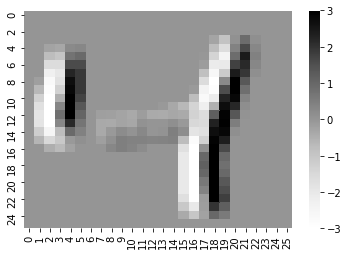

In [19]:
sns.heatmap(model_vertical_edge.predict(x_train[2:3]/255).reshape(26, 26),cmap='Greys')
plt.savefig("4-vertical-edge-linear.pdf", transparent=True)

In [20]:
T = model_vertical_edge_relu.layers[0].get_weights()
filter_conv = filter_conv
T[0] = filter_conv.reshape(T[0].shape)
model_vertical_edge_relu.layers[0].set_weights(T)

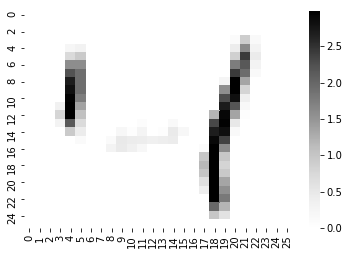

In [21]:
sns.heatmap(model_vertical_edge_relu.predict(x_train[2:3]/255).reshape(26, 26),cmap='Greys')
plt.savefig("4-vertical-edge-relu.pdf", transparent=True)

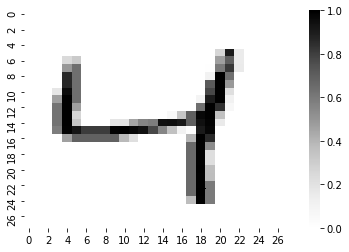

In [22]:
sns.heatmap((x_train[2:3]/255).reshape(28, 28),cmap='Greys')
plt.savefig("mnist-4.pdf", transparent=True)

In [23]:
model_horizontal_edge_relu = keras.Sequential()
model_horizontal_edge_relu.add(layers.Conv2D(filters=1, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

In [24]:
T = model_horizontal_edge_relu.layers[0].get_weights()
T[0] = filter_conv.T.reshape(T[0].shape)
model_horizontal_edge_relu.layers[0].set_weights(T)

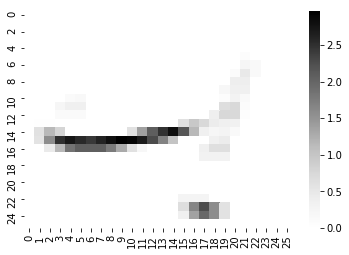

In [25]:
sns.heatmap(model_horizontal_edge_relu.predict(x_train[2:3]/255).reshape(26, 26),cmap='Greys')
plt.savefig("4-horizontal-edge-relu.pdf", transparent=True)

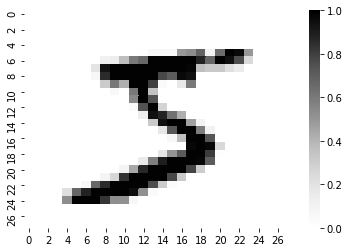

In [26]:
sns.heatmap((x_train[0:1]/255).reshape(28, 28),cmap='Greys')
plt.savefig("mnist-5.pdf", transparent=True)

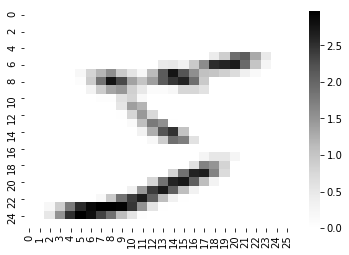

In [27]:
sns.heatmap(model_horizontal_edge_relu.predict(x_train[0:1]/255).reshape(26, 26),cmap='Greys')
plt.savefig("5-horizontal-edge-relu.pdf", transparent=True)

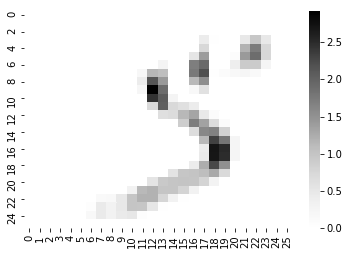

In [28]:
sns.heatmap(model_vertical_edge_relu.predict(x_train[0:1]/255).reshape(26, 26),cmap='Greys')
plt.savefig("5-vertical-edge-relu.pdf", transparent=True)

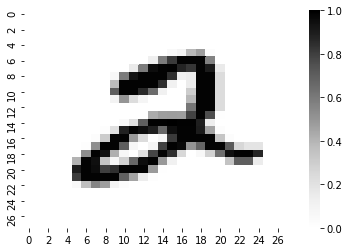

In [31]:
sns.heatmap((x_train[5:6]/255).reshape(28, 28),cmap='Greys')
plt.savefig("mnist-2.pdf", transparent=True)

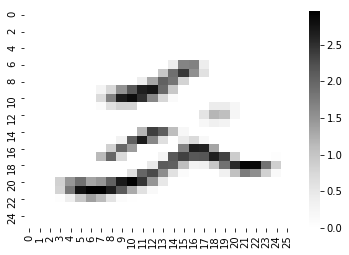

In [32]:
sns.heatmap(model_horizontal_edge_relu.predict(x_train[5:6]/255).reshape(26, 26),cmap='Greys')
plt.savefig("2-horizontal-edge-relu.pdf", transparent=True)

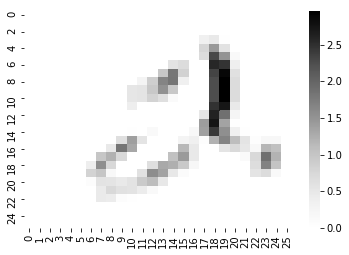

In [33]:
sns.heatmap(model_vertical_edge_relu.predict(x_train[5:6]/255).reshape(26, 26),cmap='Greys')
plt.savefig("2-vertical-edge-relu.pdf", transparent=True)

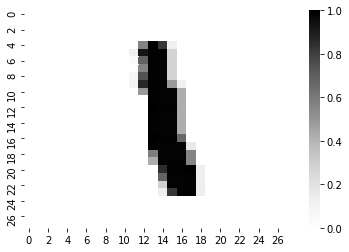

In [35]:
sns.heatmap((x_train[6:7]/255).reshape(28, 28),cmap='Greys')
plt.savefig("mnist-1.pdf", transparent=True)

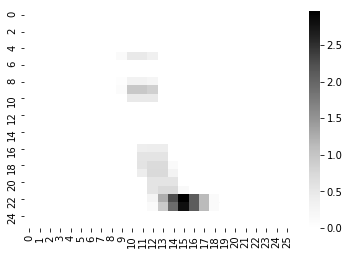

In [36]:
sns.heatmap(model_horizontal_edge_relu.predict(x_train[6:7]/255).reshape(26, 26),cmap='Greys')
plt.savefig("1-horizontal-edge-relu.pdf", transparent=True)

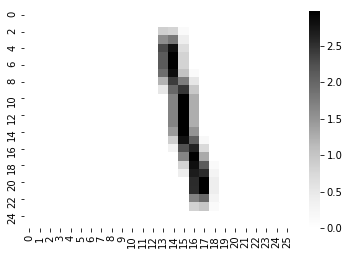

In [37]:
sns.heatmap(model_vertical_edge_relu.predict(x_train[6:7]/255).reshape(26, 26),cmap='Greys')
plt.savefig("1-vertical-edge-relu.pdf", transparent=True)

### CIFAR



In [38]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 91s 1us/step


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))

In [98]:
model_horizontal_edge_relu = keras.Sequential()
model_horizontal_edge_relu.add(layers.Conv2D(filters=1, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))


In [99]:
model_horizontal_edge_relu.layers[0].get_weights()[0].shape

(3, 3, 3, 1)

In [105]:
filter_3d_horizontal = np.empty((3, 3, 3))
filter_3d_horizontal[:] = filter_conv.T

In [106]:
filter_3d_horizontal

array([[[ 1.,  1.,  1.],
        [ 0.,  0.,  0.],
        [-1., -1., -1.]],

       [[ 1.,  1.,  1.],
        [ 0.,  0.,  0.],
        [-1., -1., -1.]],

       [[ 1.,  1.,  1.],
        [ 0.,  0.,  0.],
        [-1., -1., -1.]]])

In [107]:
T = model_horizontal_edge_relu.layers[0].get_weights()
T[0] = filter_3d_horizontal.reshape(T[0].shape)
model_horizontal_edge_relu.layers[0].set_weights(T)

/home/nipunbatra-pc/anaconda3/lib/python3.7/site-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


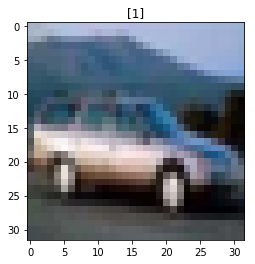

In [79]:
plt.imshow(x_train[4])
plt.title(y_train[4])
plt.savefig("cifar-10-car.pdf", transparent=True)

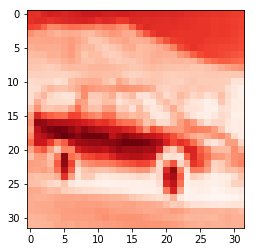

In [80]:
plt.imshow(x_train[4][:, :, 0], cmap='Reds')
plt.savefig("cifar-10-car-red.pdf", transparent=True)

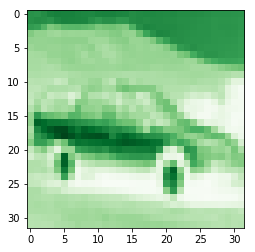

In [82]:
plt.imshow(x_train[4][:, :, 1], cmap='Greens')
plt.savefig("cifar-10-car-green.pdf", transparent=True)

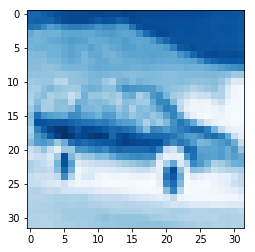

In [83]:
plt.imshow(x_train[4][:, :, 2], cmap='Blues')
plt.savefig("cifar-10-car-blue.pdf", transparent=True)

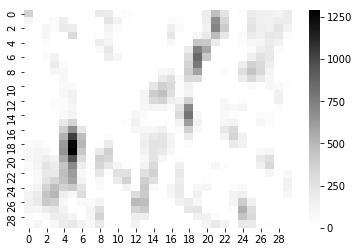

In [111]:
sns.heatmap(model_horizontal_edge_relu.predict(x_train[6:7]).reshape(30, 30),cmap='Greys')


In [96]:
x_train.shape[1:]

(32, 32, 3)

In [110]:
model_horizontal_edge_relu.predict(x_train[4:5]).shape

(1, 30, 30, 1)

In [112]:
model_vertical_edge_relu = keras.Sequential()
model_vertical_edge_relu.add(layers.Conv2D(filters=1, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))


In [139]:
filter_3d_vertical = np.empty((3, 3, 3))
filter_3d_vertical[:] = filter_conv
filter_3d_vertical = filter_3d_vertical

T = model_vertical_edge_relu.layers[0].get_weights()
T[0] = filter_3d_vertical.reshape(T[0].shape)
model_vertical_edge_relu.layers[0].set_weights(T)

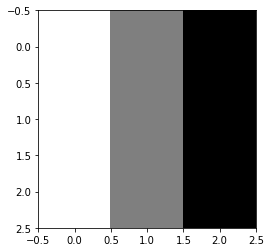

In [140]:
plt.imshow((filter_3d_horizontal+1)/2)

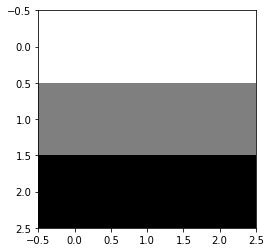

In [141]:
plt.imshow(((filter_3d_vertical+1)/2).T)

In [142]:
filter_3d_vertical

array([[[ 1.,  0., -1.],
        [ 1.,  0., -1.],
        [ 1.,  0., -1.]],

       [[ 1.,  0., -1.],
        [ 1.,  0., -1.],
        [ 1.,  0., -1.]],

       [[ 1.,  0., -1.],
        [ 1.,  0., -1.],
        [ 1.,  0., -1.]]])

In [121]:
(filter_3d_vertical+1)/2

array([[[1. , 0.5, 0. ],
        [1. , 0.5, 0. ],
        [1. , 0.5, 0. ]],

       [[1. , 0.5, 0. ],
        [1. , 0.5, 0. ],
        [1. , 0.5, 0. ]],

       [[1. , 0.5, 0. ],
        [1. , 0.5, 0. ],
        [1. , 0.5, 0. ]]])

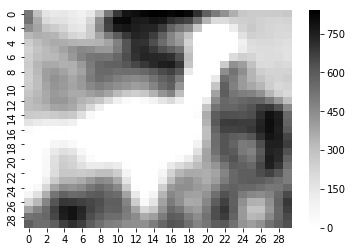

In [133]:
sns.heatmap(model_vertical_edge_relu.predict(x_train[6:7]).reshape(30, 30),cmap='Greys')


In [145]:
model_vertical_edge_relu.layers[0].get_weights()[0][0].shape

(3, 3, 1)

In [155]:
import scipy
img = x_train[6:7].reshape(32, 32, 3)
from skimage import color
img = color.rgb2gray(img)
sharpen_kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
image_sharpen = scipy.signal.convolve2d(img, sharpen_kernel, 'valid')

In [159]:
from skimage import io

In [167]:
beach = io.imread("beach.jpg")

In [168]:
beach.shape

(1704, 2272, 3)

In [164]:
buildings = io.imread("buildings.jpg")

In [166]:
buildings.shape

(1704, 2272, 3)

(-0.5, 2271.5, 1703.5, -0.5)

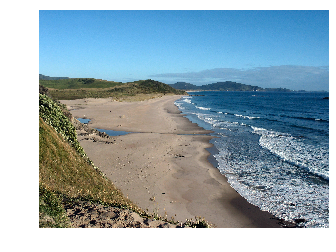

In [210]:
plt.imshow(beach)
plt.axis('OFF')

(-0.5, 2271.5, 1703.5, -0.5)

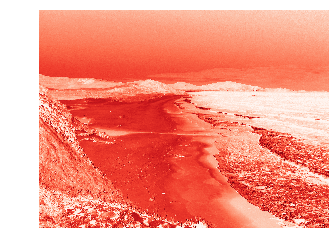

In [211]:
plt.imshow(beach[:, :, 0], cmap='Reds')
plt.axis('off')

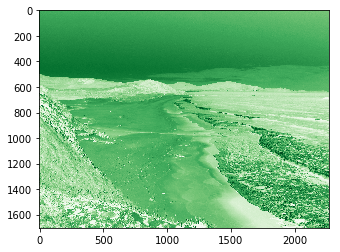

In [178]:
plt.imshow(beach[:, :, 1], cmap='Greens')

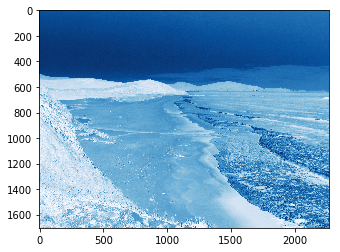

In [177]:
plt.imshow(beach[:, :, 2], cmap='Blues')

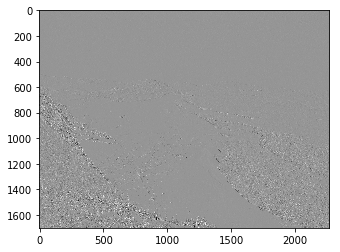

In [213]:
vertical_kernel = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
image_out_beach_red = scipy.signal.convolve2d(beach[:, :, 0], vertical_kernel, 'valid')
plt.imshow(image_out_beach_red, cmap='Greys')

(-0.5, 2269.5, 1701.5, -0.5)

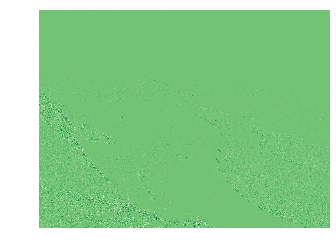

In [209]:
vertical_kernel = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
image_out_beach_green = scipy.signal.convolve2d(beach[:, :, 1], vertical_kernel, 'valid')
plt.imshow(image_out_beach_green, cmap='Greens')
plt.axis('off')

(-0.5, 2269.5, 1701.5, -0.5)

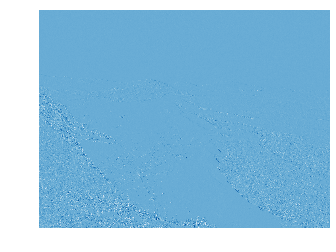

In [208]:
vertical_kernel = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
image_out_beach_blue = scipy.signal.convolve2d(beach[:, :, 2], vertical_kernel, 'valid')
plt.imshow(image_out_beach_blue, cmap='Blues')
plt.axis('off')

(-0.5, 2269.5, 1701.5, -0.5)

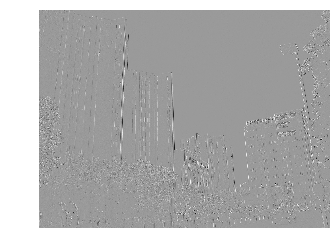

In [207]:
image_out_buildings_blue = scipy.signal.convolve2d(buildings[:, :, 2], vertical_kernel, 'valid')
plt.imshow(image_out_buildings_blue, cmap='Greys')
plt.axis('off')

In [200]:
horizontal_kernel = vertical_kernel.T
horizontal_kernel


array([[ 1,  1,  1],
       [ 0,  0,  0],
       [-1, -1, -1]])

(-0.5, 2269.5, 1701.5, -0.5)

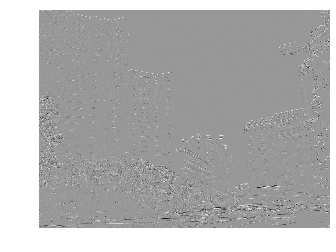

In [206]:
image_out_buildings_blue_horizontal = scipy.signal.convolve2d(buildings[:, :, 2], horizontal_kernel, 'valid')
plt.imshow(image_out_buildings_blue_horizontal, cmap='Greys')
plt.axis('off')